This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# The mathematical building blocks of neural networks 神经网络的数学构建块

## A first look at a neural network

**Loading the MNIST dataset in Keras**

In [25]:
from tensorflow.keras.datasets import mnist #导入MNIST数据集
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() #加载数据集，train_x训练x,test_x测试x

11490434/11490434 [==============================] - 0s 0us/step


In [26]:
train_images.shape #返回训练图像的维度
train_images.ndim #返回数组train_images的维度数

3

In [27]:
train_images.shape

(60000, 28, 28)

In [28]:
len(train_labels)

60000

In [29]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [30]:
test_images.shape

(10000, 28, 28)

In [31]:
len(test_labels)

10000

In [32]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**The network architecture网络架构**

In [43]:
from tensorflow import keras#导入Keras
from tensorflow.keras import layers#从Keras中导入layers模块
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax") #model=xxxxx 定义一个模型 Sequential模型是Keras中的一个模型，用于线性堆叠层
])

在TensorFlow中，layers模块是Keras API的一部分，专门用于构建神经网络的各个层。每个层都是一个可以插入到模型中以构建深度学习网络的构件。这些层封装了神经网络中的核心操作，如线性变换、激活函数、卷积操作等，以及与这些操作相关的参数（如权重和偏置）。layers模块使得创建复杂的神经网络变得更简单和直观，因为它提供了高度抽象化的界面来定义模型的架构。

以下是一些tensorflow.keras.layers模块中常用的层类型：

Dense（全连接层）: 最基本的神经网络层，每个输入节点都与输出节点全连接。
Activation（激活层）: 应用激活函数的层，如ReLU、sigmoid或softmax。
Conv2D（二维卷积层）: 对于图像和视频等二维数据，执行卷积操作的层。
MaxPooling2D（二维最大池化层）: 对于二维输入数据，使用最大池化方法进行下采样的层。
Dropout（丢弃层）: 为了减少过拟合，随机丢弃网络中的一些激活。
LSTM（长短期记忆层）: 用于处理序列数据的循环神经网络（RNN）层。
Flatten（扁平化层）: 将多维输入一维化，常用于从卷积层到全连接层的过渡。
使用这些预定义的层，你可以通过堆叠和组合它们来构建各种神经网络结构，从简单的线性模型到复杂的深度学习模型。每个层都可以通过关键字参数进行配置，以调整其行为（例如，更改激活函数、调整卷积核的数量和大小等）。这种模块化的方法大大简化了模型定义和实验的过程。
添加层到模型:

layers.Dense(512, activation="relu") 这是模型的第一层，它是一个密集连接（也称为全连接）的神经层。该层具有512个神经元，并使用ReLU（Rectified Linear Unit）激活函数。Dense层的每个神经元都会接收到前一层所有神经元的输出作为输入，对这些输入进行加权和，然后通过ReLU函数进行非线性变换。
layers.Dense(10, activation="softmax") 这是模型的第二层，也是输出层。它是另一个Dense层，有10个神经元，对应于10个类别的输出（因为MNIST数据集有10个手写数字类别）。该层使用softmax激活函数，这使得输出可以被解释为概率分布，每个神经元的输出代表属于相应类别的概率。

**The compilation step**#编译步骤

In [34]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

**优化器（Optimizer）**是一种调整网络权重以最小化损失函数的算法。这里使用的"rmsprop"是一种适应性学习率方法，对于许多类型的问题来说是一种非常高效的优化方式。RMSprop优化器是一种非常流行的选择，特别是对于循环神经网络（RNNs）。

loss="sparse_categorical_crossentropy"
**损失函数（Loss Function）**衡量模型预测值与真实值之间的差异，是模型训练过程中需要最小化的目标函数。这里使用的"sparse_categorical_crossentropy"是一个常用于多类分类问题的损失函数，适用于每个样本属于严格一个类别的情况。"Sparse"表示标签被直接以整数形式提供，在这种情况下，不需要将标签转换为one-hot编码形式。

metrics=["accuracy"]
**评估指标（Metrics）**用于监视训练和测试步骤。这里"accuracy"表示模型的正确率，即正确预测的样本数占总样本数的比例。对于分类问题，准确率是一个常用的性能指标。

**Preparing the image data**图像数据准备（图像数据预处理）

In [35]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

.reshape((60000, 28 * 28)) 和 .reshape((10000, 28 * 28)) 将图像数据从3D张量（包含图像高度、宽度和颜色通道）转换为2D张量（图像索引、784个像素值）。由于模型的输入层期望的是一维的像素向量，这一步是必要的。对于MNIST数据集，由于是灰度图像，因此可以忽略颜色通道，只考虑高度和宽度。


.astype("float32") 将图像像素值的数据类型转换为float32，这是大多数神经网络操作的标准数据类型。


/ 255 将像素值归一化到0到1的范围内。原始的图像像素值是整数，范围从0到255。归一化是深度学习中常用的预处理步骤，有助于加快模型训练速度，提高模型的收敛速率。

**"Fitting" the model**安装模型

In [36]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 12s 24ms/step - loss: 0.2688 - accuracy: 0.9237
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1063 - accuracy: 0.9680
Epoch 3/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0696 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0501 - accuracy: 0.9853
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0379 - accuracy: 0.9890


**Using the model to make predictions**

In [37]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 99ms/step


array([5.5217470e-07, 2.5281626e-09, 9.1713609e-06, 6.1741989e-04,
       3.8954215e-11, 4.9663310e-08, 9.0891066e-11, 9.9936646e-01,
       9.3804850e-08, 6.2138615e-06], dtype=float32)

In [38]:
predictions[0].argmax()

7

In [39]:
predictions[0][7]

0.99936646

In [40]:
test_labels[0]

7

**Evaluating the model on new data**

In [41]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0676 - accuracy: 0.9789
test_acc: 0.9789000153541565


## Data representations for neural networks

### Scalars (rank-0 tensors)

In [44]:
import numpy as np
x = np.array(12)
x

array(12)

In [45]:
x.ndim

0

### Vectors (rank-1 tensors)

In [46]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [47]:
x.ndim

1

### Matrices (rank-2 tensors)

In [48]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

### Rank-3 and higher-rank tensors

In [49]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

### Key attributes

In [50]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [51]:
train_images.ndim

3

In [52]:
train_images.shape

(60000, 28, 28)

In [53]:
train_images.dtype

dtype('uint8')

**Displaying the fourth digit**

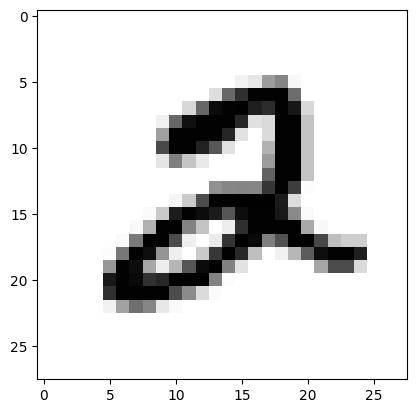

In [54]:
import matplotlib.pyplot as plt
digit = train_images[5]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [55]:
train_labels[4]

9

In [56]:
test_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  84, 185, 159, 151,  60,  36,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 222, 254, 254, 254, 254, 241, 198,
        198, 198, 198, 198, 198, 198, 198, 170,  52,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  67, 114,  72, 114, 163, 227, 254,
        225, 254, 254, 254, 250, 229, 254, 254, 140,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  17,  66,
         14,  67,  67,  67,  59,  21, 236, 254, 106,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  83, 253, 209,  18,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  22, 233, 255,  83,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 129, 254, 238,  44,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  59, 249, 254,  62,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 133, 254, 187,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   9, 205, 248,  58,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 126, 254, 182,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  75, 251, 240,  57,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         19, 221, 254, 166,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
        203, 254, 219,  35,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38,
        254, 254,  77,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  31, 224,
        254, 115,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 133, 254,
        254,  52,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

### Manipulating tensors in NumPy

In [57]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [58]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [59]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [60]:
my_slice = train_images[:, 14:, 14:]

In [61]:
my_slice = train_images[:, 7:-7, 7:-7]

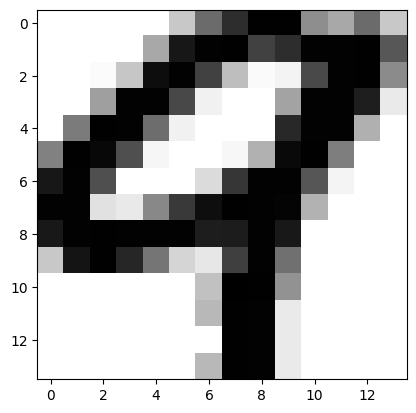

In [62]:
plt.imshow(my_slice[4],cmap=plt.cm.binary)
plt.show()

### The notion of data batches

In [63]:
batch = train_images[:128]

In [64]:
batch = train_images[128:256]

In [65]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]

### Real-world examples of data tensors

### Vector data

### Timeseries data or sequence data

### Image data

### Video data

## The gears of neural networks: tensor operations

### Element-wise operations

In [1]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [2]:
import numpy as np
aa = np.array([[1,2,3,-1],[1,-1,-1,0]])

In [3]:
aa

array([[ 1,  2,  3, -1],
       [ 1, -1, -1,  0]])

In [4]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [66]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y  # 向量直接相加即可
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.01 s


In [6]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 1.94 s


### Broadcasting

In [8]:
import numpy as np
x = np.array([1,2,3,4,5])
y = np.array([[1,1,1,1,1],[1,2,3,2,4]])

In [11]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))

In [10]:
y = np.expand_dims(y, axis=0)

In [12]:
Y = np.concatenate([y] * 32, axis=0)

In [13]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [14]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

### Tensor product

In [16]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)

In [17]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [18]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [19]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [20]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

### Tensor reshaping

In [67]:
train_images = train_images.reshape((60000, 28 * 28))

In [68]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [69]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [70]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

### Geometric interpretation of tensor operations

### A geometric interpretation of deep learning

## The engine of neural networks: gradient-based optimization

### What's a derivative?

### Derivative of a tensor operation: the gradient

### Stochastic gradient descent

### Chaining derivatives: The Backpropagation algorithm

#### The chain rule

#### Automatic differentiation with computation graphs

#### The gradient tape in TensorFlow

In [71]:
import tensorflow as tf
x = tf.Variable(0.)
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [72]:
x = tf.Variable(tf.random.uniform((2, 2)))
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [73]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])

## Looking back at our first example

In [74]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [75]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [76]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [77]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.2609 - accuracy: 0.9254
Epoch 2/5
469/469 [==============================] - 6s 13ms/step - loss: 0.1073 - accuracy: 0.9680
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0706 - accuracy: 0.9790
Epoch 4/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0516 - accuracy: 0.9850
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0388 - accuracy: 0.9886


### Reimplementing our first example from scratch in TensorFlow

#### A simple Dense class

In [78]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        return [self.W, self.b]

#### A simple Sequential class

In [79]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

In [80]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

#### A batch generator

In [81]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

### Running one training step

In [ ]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [ ]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

In [ ]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

### The full training loop

In [ ]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

### Evaluating the model

In [ ]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

## Summary